In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
df = pd.read_csv(r'ds_salaries.csv')
df.head()


work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US            S  
2               US            S  
3               CA            M  
4               CA            M

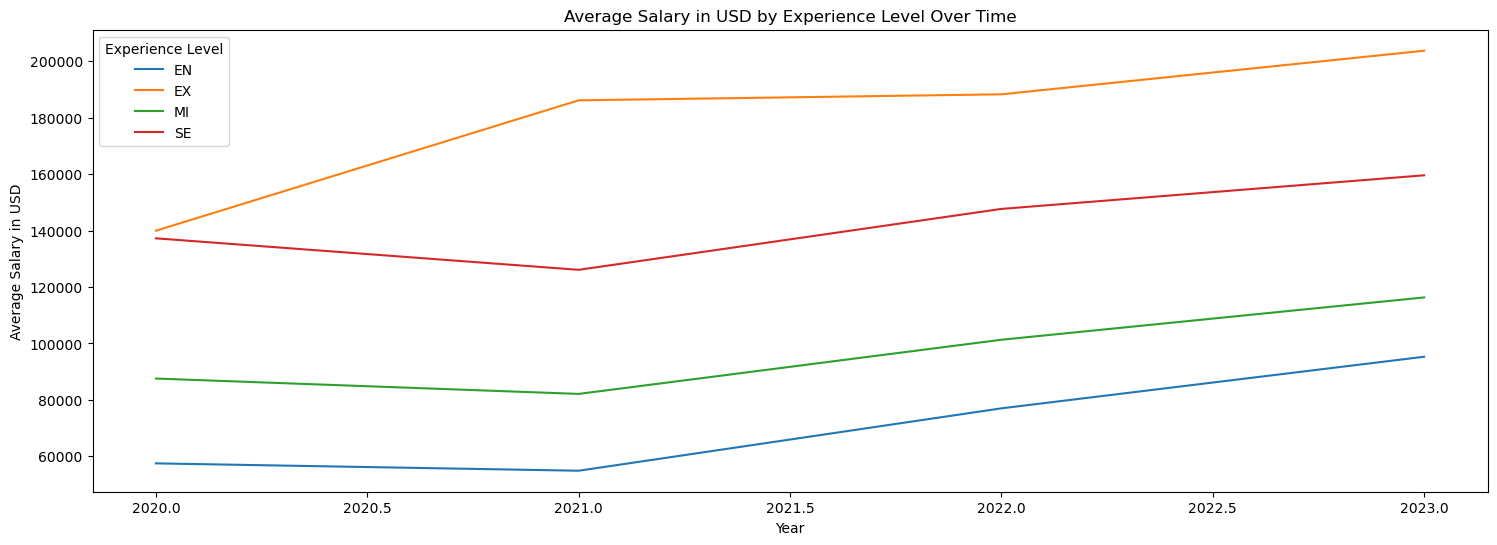

In [21]:
group = df.groupby(['work_year', 'experience_level'])

salary_group = group['salary_in_usd'].mean().reset_index()

sort_salary = salary_group.sort_values(by=['work_year','experience_level'])

## Plotting

plt.figure(figsize=(18,6))
sns.lineplot(data = salary_group, x = 'work_year', y = 'salary_in_usd', hue='experience_level')
plt.title('Average Salary in USD by Experience Level Over Time')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.legend(title='Experience Level')
plt.show()


#### What Are the Differences in Salaries in USD by Employment Type Across Different Years?

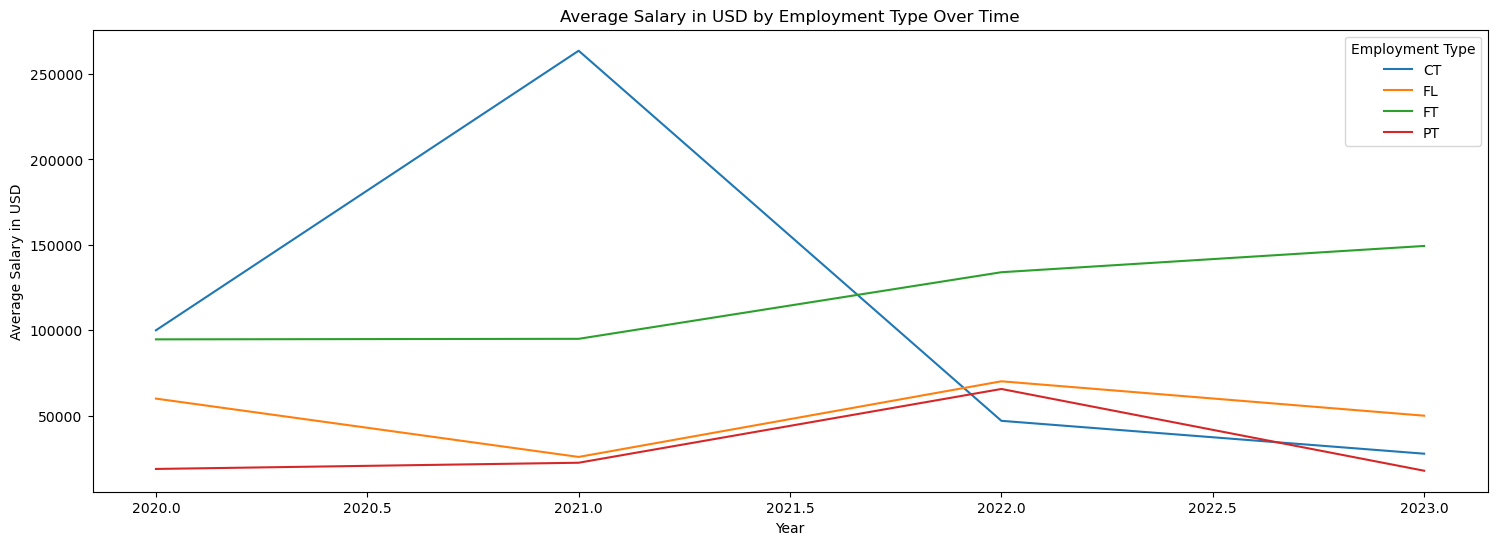

work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0       80000             EUR          85847                 ES           100   
1       30000             USD          30000                 US           100   
2       25500             USD          25500                 US           100   
3      175000             USD         175000                 CA           100   
4      120000             USD         120000                 CA           100   
...       ...             ...            ...                ...           ...   
3750   412000             USD         412000                 US           100   
3751   151000             USD         151000                 US           100   
3752   105000             USD         105000                 US           100   
3753   100000             USD         100000                 US           100   
3754  7000000             INR          94665                 IN            50   

     company_location company_size  
0                  ES            L  
1                  US            S  
2                  US            S  
3                  CA            M  
4                  CA            M  
...               ...          ...  
3750               US            L  
3751               US            L  
3752               US            S  
3753               US            L  
3754               IN            L  

[3755 rows x 11 columns]

In [57]:
grouped = df.groupby(['work_year', 'employment_type'])

salary_mean = grouped['salary_in_usd'].mean().reset_index()

## Plotting

plt.figure(figsize=(18, 6))
sns.lineplot(data=salary_mean, x='work_year', y='salary_in_usd', hue='employment_type')
plt.title('Average Salary in USD by Employment Type Over Time')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.legend(title='Employment Type')
plt.show()
df

#### What Are the Top 5 Job Titles with the Highest Average Salaries?

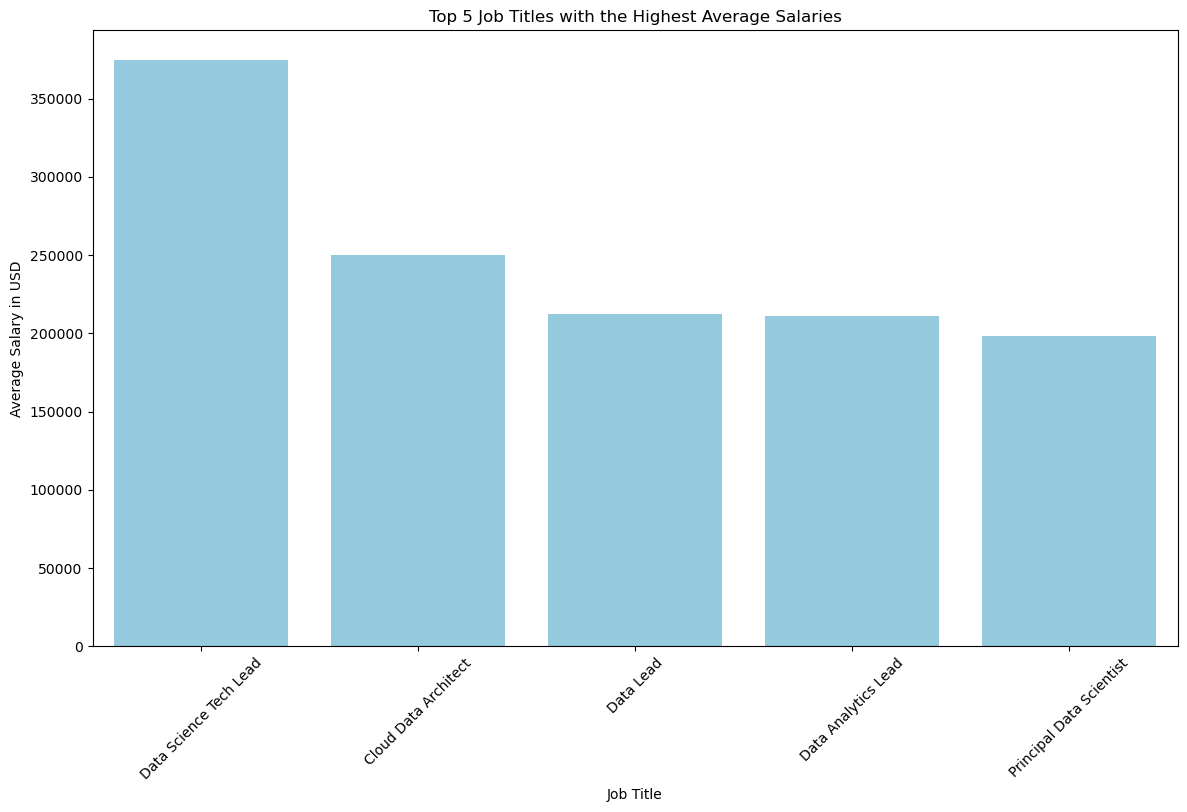

In [68]:
avg_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean().reset_index()

top_5_titles = avg_salary_by_title.sort_values(by='salary_in_usd', ascending=False).head(5)


plt.figure(figsize=(14, 8))
sns.barplot(data=top_5_titles, x='job_title', y='salary_in_usd', color='skyblue')

plt.title('Top 5 Job Titles with the Highest Average Salaries')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45)  
plt.show()